<a href="https://colab.research.google.com/github/ankushjana29/github-slideshow/blob/master/comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa as lr
import pandas as pd
import IPython.display as ipd
from librosa.display import specshow
import sklearn

In [101]:
audio1="/home/Asian_Koel010.wav"
audio2="/home/Asian_Koel012.wav"

In [102]:
ipd.Audio(audio1)

In [103]:
ipd.Audio(audio2)

In [104]:
x,sr=lr.load(audio1)

In [122]:
z,sr=lr.load(audio2)

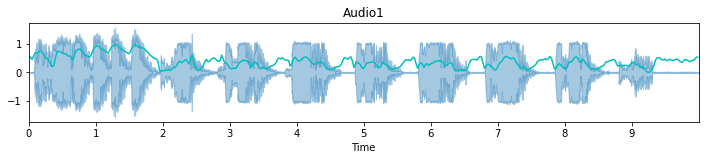

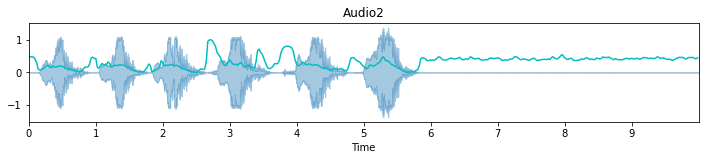

In [123]:
spectral_centroids = lr.feature.spectral_centroid(x, sr = sr)[0]

plt.figure(figsize = (12, 4))
frames = range(len(spectral_centroids))
t = lr.frames_to_time(frames)

def normalize(x, axis = 0):
  return sklearn.preprocessing.minmax_scale(x, axis = axis)

plt.subplot(2,1,1)
plt.title("Audio1")
lr.display.waveplot(x, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_centroids), color = 'c')

spectral_centroids = lr.feature.spectral_centroid(z, sr = sr)[0]

plt.figure(figsize = (12, 4))
frames = range(len(spectral_centroids))
t = lr.frames_to_time(frames)

def normalize(z, axis = 0):
  return sklearn.preprocessing.minmax_scale(z, axis = axis)

plt.subplot(2,1,2)
plt.title("Audio2")
lr.display.waveplot(z, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_centroids), color = 'c')

SPECTRAL CENTROID 

Text(0.5, 1.0, 'Audio2')

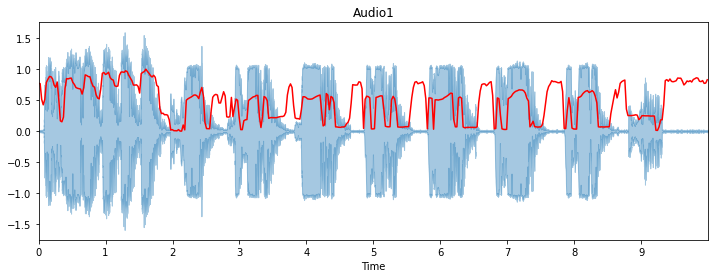

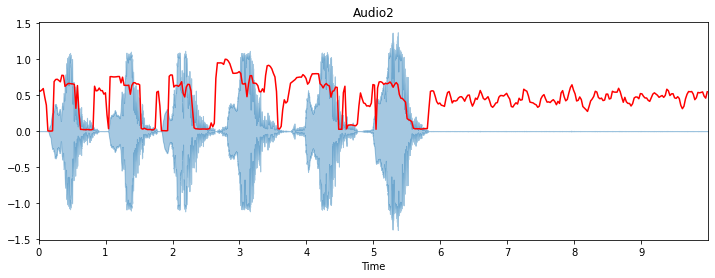

In [143]:
spectral_rolloff = lr.feature.spectral_rolloff(x + 0.01, sr = sr)[0]
plt.figure(figsize = (12, 4))
lr.display.waveplot(x, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_rolloff), color = 'r')
plt.title("Audio1")

spectral_rolloff = lr.feature.spectral_rolloff(z + 0.01, sr = sr)[0]
plt.figure(figsize = (12, 4))
lr.display.waveplot(z, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_rolloff), color = 'r')
plt.title("Audio2")


SPECTRAL ROLLOFF 

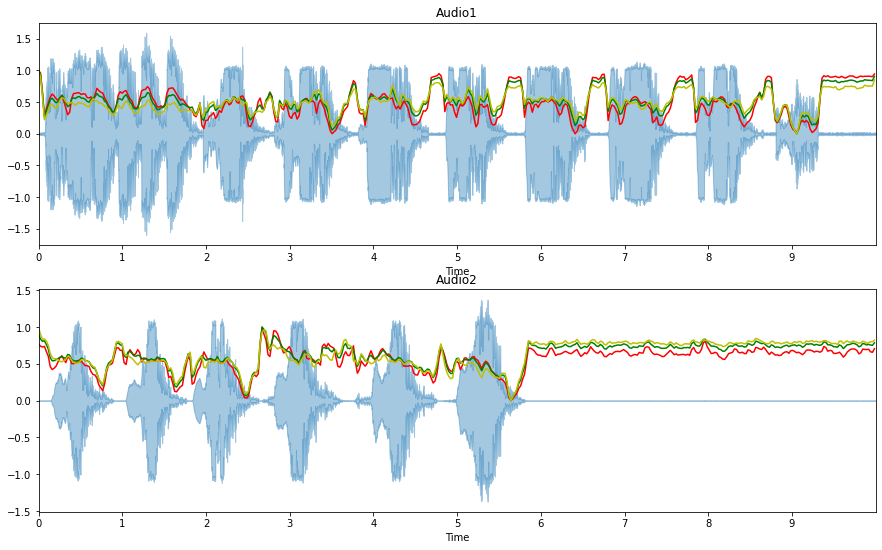

In [144]:
spectral_bandwidth_2 = lr.feature.spectral_bandwidth(x + 0.01, sr = sr)[0]
spectral_bandwidth_3 = lr.feature.spectral_bandwidth(x + 0.01, sr = sr, p = 3)[0]
spectral_bandwidth_4 = lr.feature.spectral_bandwidth(x + 0.01, sr = sr, p = 4)[0]
plt.figure(figsize = (15, 9))
plt.subplot(2,1,1)
lr.display.waveplot(x, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color = 'r')
plt.plot(t, normalize(spectral_bandwidth_3), color = 'g')
plt.plot(t, normalize(spectral_bandwidth_4), color = 'y')
plt.title("Audio1")

spectral_bandwidth_2 = lr.feature.spectral_bandwidth(z + 0.01, sr = sr)[0]
spectral_bandwidth_3 = lr.feature.spectral_bandwidth(z + 0.01, sr = sr, p = 3)[0]
spectral_bandwidth_4 = lr.feature.spectral_bandwidth(z + 0.01, sr = sr, p = 4)[0]
plt.subplot(2,1,2)
lr.display.waveplot(z, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color = 'r')
plt.plot(t, normalize(spectral_bandwidth_3), color = 'g')
plt.plot(t, normalize(spectral_bandwidth_4), color = 'y')
plt.title("Audio2")

plt.show()

SPECTRAL BANDWIDTH 

In [113]:
#calculate the amplitude envelope

FRAME_SIZE=1024
HOP_LENGTH=512

def amplitude_envelope(signal,frame_size,hop_length):
  amplitude_envelope=[]

  #calculate AE for each frame
  for i in range(0,len(signal),hop_length):
    current_frame=max(signal[i:i+frame_size])
    amplitude_envelope.append(current_frame)

  return np.array(amplitude_envelope)  

def fancy_amplitude_envelope(signal,frame_size,hop_length):
  return np.array([max(signal[i:i+frame_size]) for i in range(0,signal.size,hop_length)])

In [76]:
ae_x=amplitude_envelope(x,FRAME_SIZE,HOP_LENGTH)
len(ae_x)

431

In [73]:
fancy_ae_x=fancy_amplitude_envelope(x,FRAME_SIZE,HOP_LENGTH)

In [77]:
(ae_x == fancy_ae_x).all()

True

In [98]:
ae_z=amplitude_envelope(z,FRAME_SIZE,HOP_LENGTH)
len(ae_z)

431

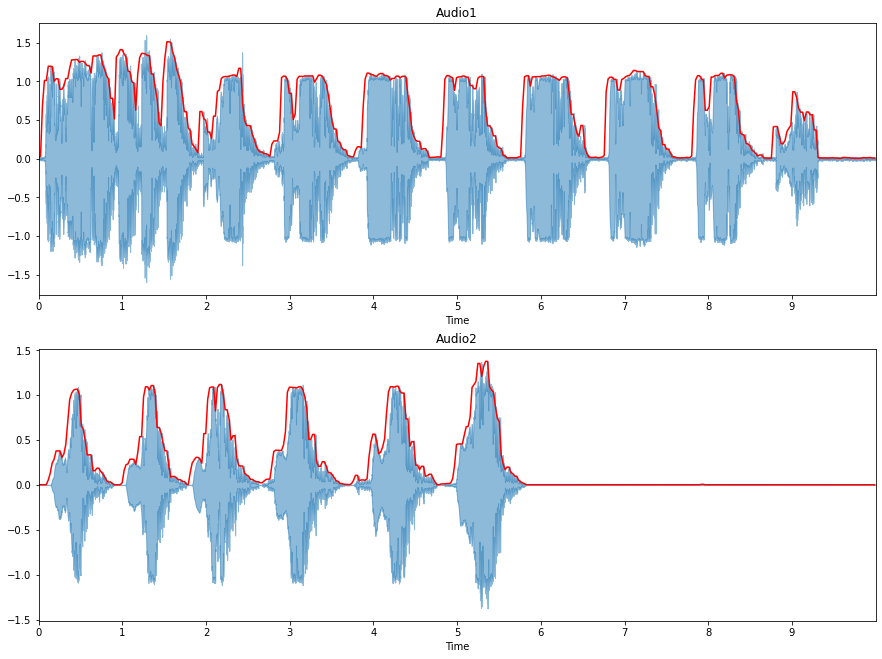

In [97]:
#visualize amplitude envelope
frames=range(0,ae_x.size)
t=lr.frames_to_time(frames,hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
lr.display.waveplot(x,alpha=0.5)
plt.plot(t,ae_x,color="r")
plt.title("Audio1")
plt.ylim=([-1,1])

plt.subplot(3,1,2)
lr.display.waveplot(z,alpha=0.5)
plt.plot(t,ae_z,color="r")
plt.title("Audio2")
plt.ylim=([-1,1])


plt.show()

AMPLITUDE ENVELOPE


In [126]:
x_ft=np.fft.fft(x)

In [131]:
z_ft=np.fft.fft(z)

In [129]:
def plot_magnitude_spectrum(signal,title,sr,f_ratio=1):
  ft=np.fft.fft(signal)
  magnitude_spectrum=np.abs(ft)

  plt.figure(figsize=(18,5))

  freq=np.linspace(0,sr,len(magnitude_spectrum))
  num_frequency_bins=int(len(freq)*f_ratio)

  plt.plot(freq[:num_frequency_bins],magnitude_spectrum[:num_frequency_bins])
  plt.xlabel("Frequency (Hz)")
  plt.title(title)

  plt.show()

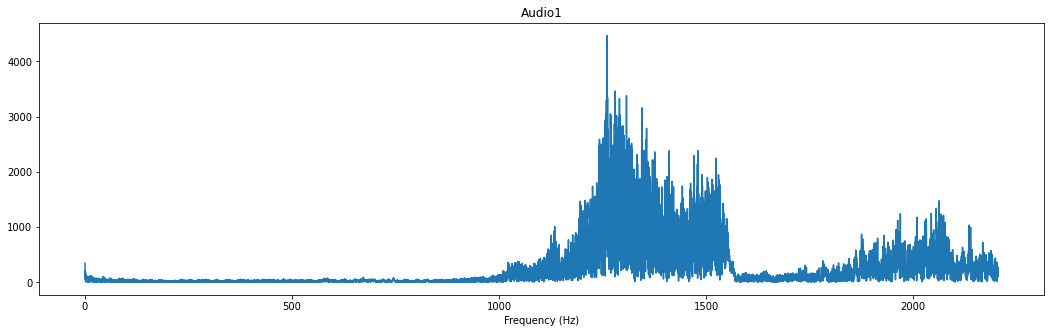

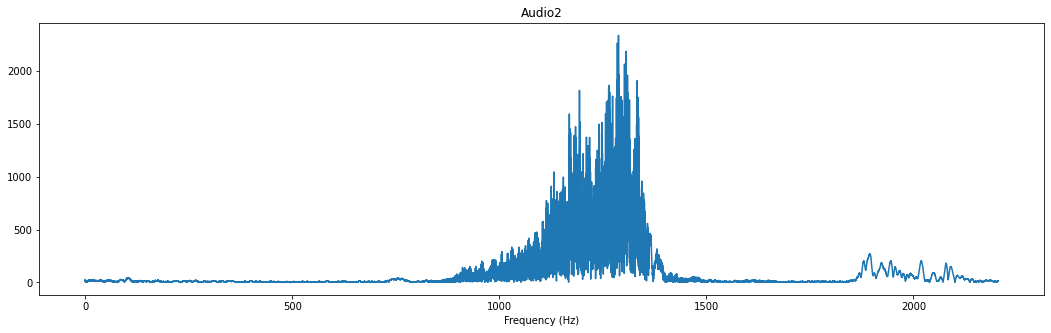

In [136]:

plot_magnitude_spectrum(x,"Audio1",sr,0.1)


plot_magnitude_spectrum(z,"Audio2",sr,0.1)

FFT